Task: Predict attrition of your valuable employees.

Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.

Education
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

EnvironmentSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobInvolvement
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

PerformanceRating
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

RelationshipSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

WorkLifeBalance
1 'Bad'
2 'Good'
3 'Better'
4 'Best'


https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

In [1]:
import pandas as pd
import numpy as np

# Data preparation

In [2]:
df = pd.read_csv('HR Employee Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
assert df.shape == (1470, 35)

In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Let's distinguish categorical and numerical features. As we can see from dataset description, we have several features which seems to be numerical but indeed they are categorical. Let's transform them into categorical.

In [7]:
dict_education = {1: 'below_college',
                  2: 'college',
                  3: 'bachelor',
                  4: 'master',
                  5: 'doctor'}
# the same for JobInvolvement, JobSatisfaction, RelationshipSatisfaction

dict_envsat = {1: 'low',
               2: 'medium',
               3: 'high',
               4: 'very_high'}

dict_performrat = {1: 'low',
                   2: 'good',
                   3: 'excellent',
                   4: 'outstanding'}


dict_wlbalance = {1: 'bad',
                  2: 'good',
                  3: 'better',
                  4: 'best'}
dict_stockOptionLevel = {0: '0l',
                         1: '1l',
                         2: '2l',
                         3: '3l'}
dict_JobLevel = {1: '1l',
                 2: '2l',
                 3: '3l',
                 4: '4l',
                 5: '5l'}

In [8]:
df.Education = df.Education.map(dict_education)
df.EnvironmentSatisfaction = df.EnvironmentSatisfaction.map(dict_envsat)
df.JobInvolvement = df.JobInvolvement.map(dict_envsat)
df.JobSatisfaction = df.JobSatisfaction.map(dict_envsat)
df.RelationshipSatisfaction = df.RelationshipSatisfaction.map(dict_envsat)
df.PerformanceRating = df.PerformanceRating.map(dict_performrat)
df.WorkLifeBalance = df.WorkLifeBalance.map(dict_wlbalance)
df.StockOptionLevel = df.StockOptionLevel.map(dict_stockOptionLevel)
df.JobLevel = df.JobLevel.map(dict_JobLevel)

In [9]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,college,Life Sciences,1,1,...,low,80,0l,8,0,bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,below_college,Life Sciences,1,2,...,very_high,80,1l,10,3,better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,college,Other,1,4,...,medium,80,0l,7,3,better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,master,Life Sciences,1,5,...,high,80,0l,8,3,better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,below_college,Medical,1,7,...,very_high,80,1l,6,3,better,2,2,2,2


In [10]:
categorical = list(df.dtypes[df.dtypes == 'object'].index.values)
numerical = list(df.dtypes[df.dtypes == 'int64'].index.values)

In [11]:
target = ['Attrition']
categorical.remove('Attrition')

In [12]:
for col in categorical + target:
    df[col] = df[col].str.lower().str.replace('&','').str.replace('  ',' ').str.replace(' ','_')
    
df[categorical + target]

,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,Over18,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance,Attrition
0,travel_rarely,sales,college,life_sciences,medium,female,high,2l,sales_executive,very_high,single,y,yes,excellent,low,0l,bad,yes
1,travel_frequently,research_development,below_college,life_sciences,high,male,medium,2l,research_scientist,medium,married,y,no,outstanding,very_high,1l,better,no
2,travel_rarely,research_development,college,other,very_high,male,medium,1l,laboratory_technician,high,single,y,yes,excellent,medium,0l,better,yes
3,travel_frequently,research_development,master,life_sciences,very_high,female,high,1l,research_scientist,high,married,y,yes,excellent,high,0l,better,no
4,travel_rarely,research_development,below_college,medical,low,male,high,1l,laboratory_technician,medium,married,y,no,excellent,very_high,1l,better,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,travel_frequently,research_development,college,medical,high,male,very_high,2l,laboratory_technician,very_high,married,y,no,excellent,high,1l,better,no
1466,travel_rarely,research_development,below_college,medical,very_high,male,medium,3l,healthcare_representative,low,married,y,no,excellent,low,1l,better,no
1467,travel_rarely,research_development,bachelor,life_sciences,medium,male,very_high,2l,manufacturing_director,medium,married,y,yes,outstanding,medium,1l,better,no
1468,travel_frequently,sales,bachelor,medical,very_high,male,medium,2l,sales_executive,medium,married,y,no,excellent,very_high,0l,good,no


Prepare target

In [13]:
df.Attrition = (df.Attrition == 'yes').astype(int)

# Setting up validation framework

* Split the data in train/val/test sets, with 60%/20%/20% distribution.
* Seed is 42.

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [16]:
len(df_train), len(df_val), len(df_test)

(882, 294, 294)

In [17]:
df_full_train = df_full_train.reset_index(drop=True)

In [18]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

Target:

In [19]:
y_train = df_train.Attrition
y_val = df_val.Attrition
y_test = df_test.Attrition

In [20]:
del df_train['Attrition']
del df_val['Attrition']
del df_test['Attrition']

# EDA

We will work with df_full_train. Check missing values

In [21]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

As we can see, dataset has no missing values. We have already distinguished categorical and numerical features

In [22]:
print('categorical: ', categorical)
print('numerical: ', numerical)

categorical:  ['BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'Over18', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']
numerical:  ['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeCount', 'EmployeeNumber', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [23]:
df_full_train[categorical].nunique()

BusinessTravel              3
Department                  3
Education                   5
EducationField              6
EnvironmentSatisfaction     4
Gender                      2
JobInvolvement              4
JobLevel                    5
JobRole                     9
JobSatisfaction             4
MaritalStatus               3
Over18                      1
OverTime                    2
PerformanceRating           2
RelationshipSatisfaction    4
StockOptionLevel            4
WorkLifeBalance             4
dtype: int64

We have one column with unique value, which is seemed to be useless. Let's measure importance of categorical features by using mutual_info_score.

In [25]:
from sklearn.metrics import mutual_info_score

def mutual_info_attrition_score(series):
    return mutual_info_score(series, df_full_train.Attrition)

In [26]:
for col in categorical:
    print(col, ': ', round(mutual_info_attrition_score(df_full_train[col]),6))

BusinessTravel :  0.008147
Department :  0.003937
Education :  0.001731
EducationField :  0.004174
EnvironmentSatisfaction :  0.004249
Gender :  0.00069
JobInvolvement :  0.007604
JobLevel :  0.028169
JobRole :  0.035524
JobSatisfaction :  0.006597
MaritalStatus :  0.020342
Over18 :  0.0
OverTime :  0.036011
PerformanceRating :  1.3e-05
RelationshipSatisfaction :  0.000473
StockOptionLevel :  0.026731
WorkLifeBalance :  0.003373


Drop column Over18 before training model.

In [27]:
categorical.remove('Over18')

Let's create the correlation matrix for the numerical features of your train dataset.

In [28]:
df_full_train[numerical].nunique()

Age                          43
DailyRate                   775
DistanceFromHome             29
EmployeeCount                 1
EmployeeNumber             1176
HourlyRate                   71
MonthlyIncome              1094
MonthlyRate                1152
NumCompaniesWorked           10
PercentSalaryHike            15
StandardHours                 1
TotalWorkingYears            40
TrainingTimesLastYear         7
YearsAtCompany               36
YearsInCurrentRole           19
YearsSinceLastPromotion      16
YearsWithCurrManager         18
dtype: int64

we have 2 columns with unique value, we should drop them

In [29]:
numerical.remove('EmployeeCount')
numerical.remove('StandardHours')

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

Investigate the impotance of numerical features and their correlation with target

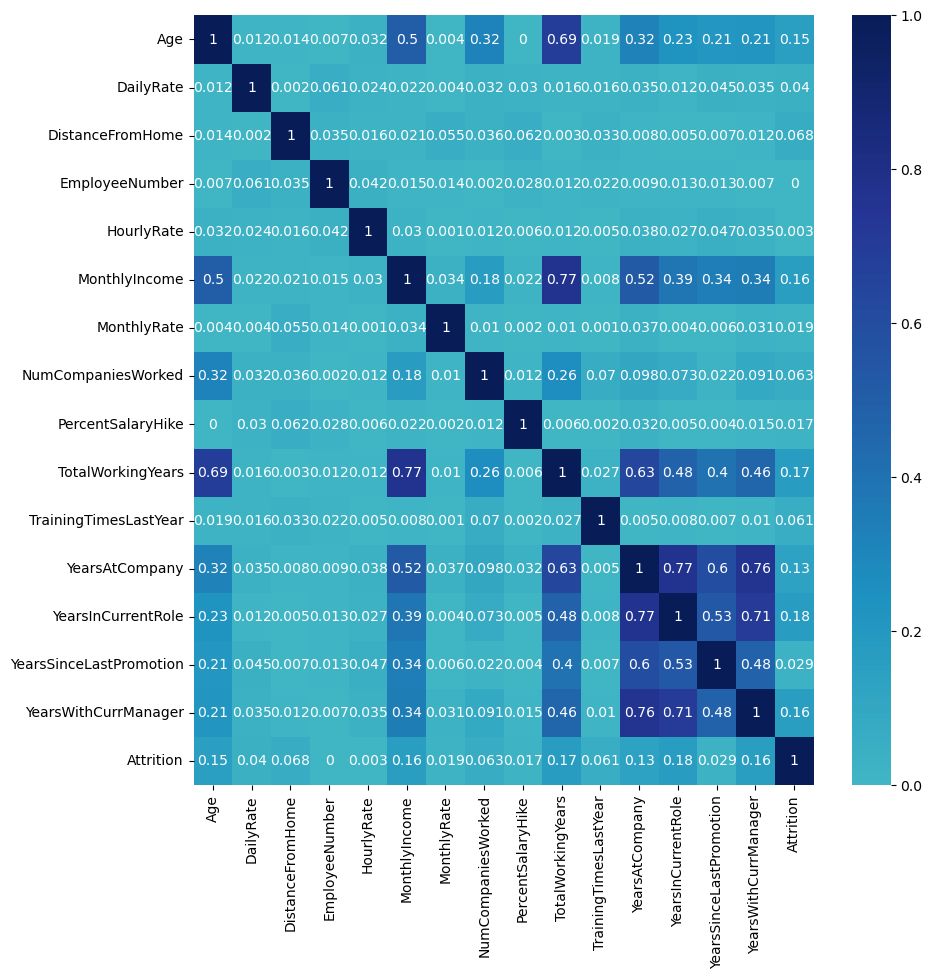

In [31]:
corr_matrix = df_full_train[numerical+target].corr().abs().round(3)
# display(corr_matrix)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data = corr_matrix, center = 0, annot=True, cmap="YlGnBu");

There are several features with quite high correlation coefficients. They seem to be linear dependent. Indeed years at current role and years at company with current manager are dependent. It can lead to overfitting. That is why it is better to use regularization. And none of the features is highly correlated with target.

# One-Hot-Encoding

In [32]:
from sklearn.feature_extraction import DictVectorizer

In [33]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [34]:
print(train_dicts[0])

{'BusinessTravel': 'travel_rarely', 'Department': 'sales', 'Education': 'bachelor', 'EducationField': 'life_sciences', 'EnvironmentSatisfaction': 'very_high', 'Gender': 'female', 'JobInvolvement': 'high', 'JobLevel': '2l', 'JobRole': 'sales_executive', 'JobSatisfaction': 'high', 'MaritalStatus': 'single', 'OverTime': 'no', 'PerformanceRating': 'excellent', 'RelationshipSatisfaction': 'high', 'StockOptionLevel': '0l', 'WorkLifeBalance': 'better', 'Age': 45, 'DailyRate': 374, 'DistanceFromHome': 20, 'EmployeeNumber': 2046, 'HourlyRate': 50, 'MonthlyIncome': 4850, 'MonthlyRate': 23333, 'NumCompaniesWorked': 8, 'PercentSalaryHike': 15, 'TotalWorkingYears': 8, 'TrainingTimesLastYear': 3, 'YearsAtCompany': 5, 'YearsInCurrentRole': 3, 'YearsSinceLastPromotion': 0, 'YearsWithCurrManager': 1}


In [35]:
dv = DictVectorizer(sparse=False)

In [36]:
X_train = dv.fit_transform(train_dicts)

In [37]:
dv.get_feature_names_out()

array(['Age', 'BusinessTravel=non-travel',
       'BusinessTravel=travel_frequently', 'BusinessTravel=travel_rarely',
       'DailyRate', 'Department=human_resources',
       'Department=research_development', 'Department=sales',
       'DistanceFromHome', 'Education=bachelor',
       'Education=below_college', 'Education=college', 'Education=doctor',
       'Education=master', 'EducationField=human_resources',
       'EducationField=life_sciences', 'EducationField=marketing',
       'EducationField=medical', 'EducationField=other',
       'EducationField=technical_degree', 'EmployeeNumber',
       'EnvironmentSatisfaction=high', 'EnvironmentSatisfaction=low',
       'EnvironmentSatisfaction=medium',
       'EnvironmentSatisfaction=very_high', 'Gender=female',
       'Gender=male', 'HourlyRate', 'JobInvolvement=high',
       'JobInvolvement=low', 'JobInvolvement=medium',
       'JobInvolvement=very_high', 'JobLevel=1l', 'JobLevel=2l',
       'JobLevel=3l', 'JobLevel=4l', 'JobLevel=5l',

In [38]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

For testing model let's prepare functions for training and testing

In [39]:
def train_model(model, df_train, y_train):
    
    dicts = df_train[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model.fit(X_train, y_train)
    
    return dv, model 

def predict(dv, model, df_val):
    
    dicts = df_val[categorical + numerical].to_dict(orient='records')
    X_val = dv.transform(dicts)
    
    y_pred = model.predict_proba(X_val)[:, 1]
    
    return y_pred

For solving the problem I will use logistic regression with l2 regularization to deal with collinearity of features, random forest classifier and xgboost

# Train Models and Model Selection

## Logistic regression

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [41]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, penalty='l2')

In [42]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [43]:
y_pred = model.predict_proba(X_val)[:, 1]

In [44]:
auc_score = roc_auc_score(y_val, y_pred)

In [45]:
auc_score

0.8931967213114754

Let's tune the model

In [46]:
C_values = np.linspace(0.01, 1, 100)
auc_scores = []

for C in C_values:
    model_initial = LogisticRegression(solver='liblinear', C=C, max_iter=1000, penalty='l2')
    dv, model = train_model(model_initial, df_train, y_train)
    
    y_pred = predict(dv, model, df_val)
    
    auc = roc_auc_score(y_val, y_pred)
    
    auc_scores.append((C, auc))
    

In [53]:
df_scores = pd.DataFrame(auc_scores, columns=['C', 'auc'])
df_scores.sort_values(by='auc', ascending=False).head(10)

,C,auc
54,0.55,0.898852
28,0.29,0.898361
29,0.30,0.897377
51,0.52,0.897131
67,0.68,0.896803
77,0.78,0.896721
48,0.49,0.896557
44,0.45,0.896557
5,0.06,0.896557
63,0.64,0.896393


In [48]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'AUC score')

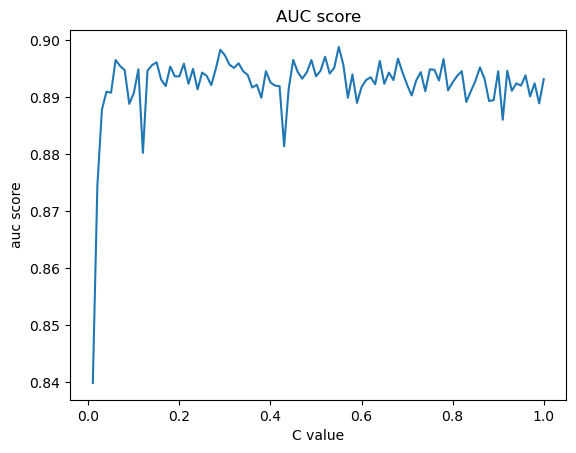

In [52]:
plt.plot(df_scores.C, df_scores.auc)
plt.xlabel('C value')
plt.ylabel('auc score')
plt.title('AUC score')

As we can see, best auc score is at C = 0.55. But let's train model with C = 0.29 on validation and train data and evaluate it on test data

In [58]:
model1 = LogisticRegression(solver='liblinear', C=0.29, max_iter=1000)
dv1, model1 = train_model(model1, df_full_train, df_full_train.Attrition)
y_pred = predict(dv1, model1, df_test)
auc = roc_auc_score(y_test, y_pred)

In [59]:
auc

0.8263448969331322

The result is good. Let's try another model: RandomForestClassifier

## RandomForestClassifier

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
max_depths = [1, 5, 10, 15, 20, 25, 30]
n_estimators = np.arange(10, 201, 10)
scores = []

for max_depth in max_depths:
    for n in n_estimators:
        rf = RandomForestClassifier(n_estimators=n, max_depth=max_depth, random_state=42, n_jobs=-1)
        dv, model = train_model(rf, df_train, y_train)
        y_pred = predict(dv, model, df_val)
        auc = roc_auc_score(y_val, y_pred)
        scores.append((max_depth, n, auc))

In [62]:
df_rf_scores = pd.DataFrame(scores, columns=['max_depth', 'n_estimators', 'auc'])
df_rf_scores.sort_values(by='auc', ascending=False).head()

,max_depth,n_estimators,auc
88,20,90,0.900533
108,25,90,0.900533
128,30,90,0.900533
89,20,100,0.897746
109,25,100,0.897746


Let's check perfomance of the model with n_estimators = 90 and max_depth = 20 on test dataset

In [63]:
rf = RandomForestClassifier(n_estimators=90, max_depth=20, random_state=42, n_jobs=-1)
dv2, model2 = train_model(rf, df_full_train, df_full_train.Attrition)
y_pred = predict(dv2, model2, df_test)
auc = roc_auc_score(y_test, y_pred)
auc

0.7159376571141277

Performance is worse.

In [64]:
import xgboost as xgb

In [65]:
features = dv.get_feature_names_out()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [66]:
xgb_scores = []
for eta in [0.1, 0.3, 0.5, 1]:
    for num_boost_round in np.arange(20, 201, 20):

        xgb_params = {
            'eta': eta, 
            'max_depth': 6,
            'min_child_weight': 1,

            'objective': 'binary:logistic',
            'nthread': 8,

            'seed': 42,
            'verbosity': 1,
        }

        model = xgb.train(xgb_params, dtrain, num_boost_round=num_boost_round)
        y_pred = model.predict(dval)
        auc = roc_auc_score(y_val, y_pred)
        xgb_scores.append((eta, num_boost_round, auc))


In [67]:
df_xgb_scores = pd.DataFrame(xgb_scores, columns=['eta', 'num_boost_round', 'auc'])
df_xgb_scores.sort_values(by='auc', ascending=False).head()


,eta,num_boost_round,auc
9,0.1,200,0.850574
1,0.1,40,0.850328
7,0.1,160,0.848689
8,0.1,180,0.848607
25,0.5,120,0.848197


Check model perfomance on test data

In [68]:
dicts = df_full_train[categorical + numerical].to_dict(orient='records')
    
dv = DictVectorizer(sparse=False)

X_full_train = dv.fit_transform(dicts)
features = dv.get_feature_names_out()

dicts_test = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(dicts_test)

dfulltrain = xgb.DMatrix(X_full_train, label=df_full_train.Attrition, feature_names=features)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=features)

xgb_params = {
            'eta': 0.1, 
            'max_depth': 6,
            'min_child_weight': 1,

            'objective': 'binary:logistic',
            'nthread': 8,

            'seed': 42,
            'verbosity': 1,
        }

model3 = xgb.train(xgb_params, dfulltrain, num_boost_round=200)
y_pred = model.predict(dtest)
auc = roc_auc_score(y_test, y_pred)
auc        

0.759175465057818

As we can see the best performance has logistic regression. Let's save it and deploy it

In [69]:
import pickle

In [70]:
output_file = 'model.bin'

In [71]:
with open(output_file, 'wb') as f_out:
    pickle.dump((dv, model), f_out)


In [72]:
with open(output_file, 'rb') as f_in:
    dv, model = pickle.load(f_in)
